## Final Project Submission

Please fill out:
* Student name: Neel Patel
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: ..


In [174]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
df = pd.read_csv('kc_house_data.csv')

In [175]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [177]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


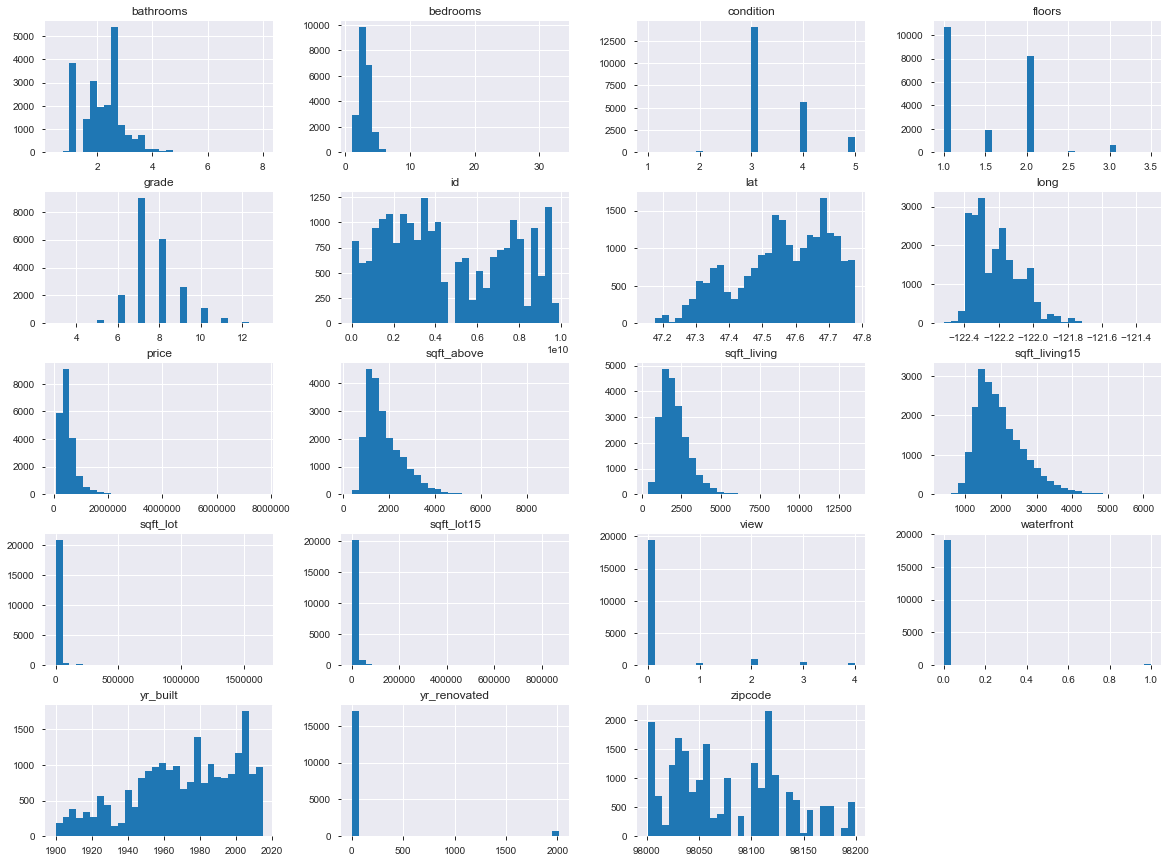

In [178]:
import warnings
warnings.filterwarnings('ignore')
df.hist(figsize = (20,15), bins=30);
# quick overview of how the columns are distributed

# Checking for missing values and wrong data types

In [179]:
data_profile = ProfileReport(df, bins=20)
data_profile
#Using the Pandas profiling library for quick information of the dataset

Number of variables,21
Number of observations,21597
Total Missing (%),1.4%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [180]:
#iterate through each column and print out the number of missing values
for column in df:
    value = df[column].isna().sum()
    if value > 0:
        print(f'{column} has {value} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [181]:
#convert date to datetime data type.
import datetime as dt

df['date'] = pd.to_datetime(df['date'])

In [182]:
# basement is of object type.
df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [183]:
# there seem to be alot of 0 values, this might be better to have as a binary data type, has basement or not.
# lets look at the values
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3480.0        1
1913.0        1
295.0         1
3500.0        1
1008.0        1
Name: sqft_basement, Length: 304, dtype: int64

'?' has been used for some of the data, most probably to indicate the data was unknown when being entered

In [184]:

df[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,2015-03-23,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,2014-09-16,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,2014-07-21,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,2015-01-20,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,2014-10-15,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


# Replace missing values

In [185]:
# it looks obvious the mode is 0, but lets check to make sure.
temp_df = df[df['sqft_basement'] != '?']
temp_df['sqft_basement'] = pd.to_numeric(temp_df['sqft_basement'], errors='coerce')
temp_df['sqft_basement'].mode()

0    0.0
dtype: float64

In [186]:
# most of the values are 0 so lets change the '?' to the mode as there are the overwhelming number and change the rest to 1 to
# indicate they have a basement.
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce').fillna(0).astype(np.int64)
df['sqft_basement'][df['sqft_basement'] > 0] = 1
df['sqft_basement'].value_counts()

0    13280
1     8317
Name: sqft_basement, dtype: int64

In [187]:
# change name of column to more appropriate description 
df = df.rename(columns={
       'sqft_basement':'has_basement'})
df['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

In [188]:
for column in df:
    value = df[column].isna().sum()
    if value > 0:
        print(f'{column} has {value} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [189]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [190]:
# similar to basement, 0 seems to be without waterfront view, and 1 means with. I'll use the mode to fill missing values
df['waterfront'] = df['waterfront'].fillna(0)

In [191]:
df['waterfront'] = df['waterfront'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
has_basement     21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(13)
memory usage: 3.5 MB


In [192]:
for column in df:
    value = df[column].isna().sum()
    if value > 0:
        print(f'{column} has {value} missing values.')

view has 63 missing values.
yr_renovated has 3842 missing values.


In [193]:
df['view'].value_counts()


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [194]:
# Based on the kaggle dataset that this data originates from, it looks like this column is not whether it has been viewed or not
# but the rating of the view the home has from a scale of 0-4.
# Based on this knowledge I'll for the moment I'll change the feature to a has a good view (anything over 0 will be 1) 
# or if it is 0 meaning no view or bad view it will be 0.

In [195]:
df['view'] = pd.to_numeric(df['view'], errors='coerce').fillna(0).astype(np.int64)
df['view'][df['view'] > 0] = 1
df['view'].value_counts()

0    19485
1     2112
Name: view, dtype: int64

In [196]:
for column in df:
    value = df[column].isna().sum()
    if value > 0:
        print(f'{column} has {value} missing values.')

yr_renovated has 3842 missing values.


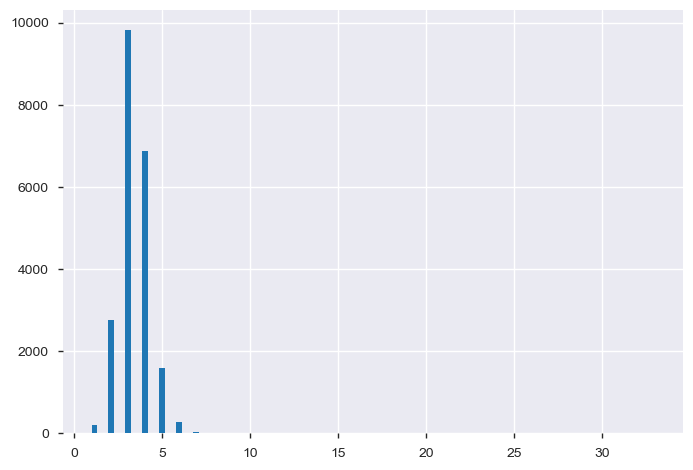

In [197]:
df['bedrooms'].hist(bins=100);


In [199]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [7]:
# Bathrooms are not whole numbers, what does this mean ?
# according to https://www.thetruthaboutrealty.com/half-bath-vs-full-bath-wheres-the-value/ bathrooms have a weird calculation. 
# 1 full bathroom is a tub, shower, a toilet, and a sink.
# 0.5 bathroom is generally just a toilet and sink
# 0.75 is generally a standing shower, toilet and sink - no tub

# I'm assumming most places are without a bathtub so 0.75 should be rounded up, 0.5 should be rounded down and a seperate toilet
# flag should be set to True. This is also true for values if bathroom count is an additional 0.25. To reach 0.25 there would 
# have to be a 0.75 bathroom and a 0.5 bathroom present.
# based on this calculation, it would be possible to have 1 main bathroom with tub, shower, toilet and sink and 2 / 4 0.5 
# bathrooms making the count 2 or 3. This would be very misleading and I think even though relty agents have a bad reputation
# I don't think they would be getting away with this kind of misrepresentation.


# I'll leave this for now

In [200]:
df['yr_renovated'].head(20)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
Name: yr_renovated, dtype: float64

In [201]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [202]:
len(df.loc[df['yr_renovated'].isnull()]) + 17755

21597

In [203]:
# the overwheming most common value is 0, indicating it's never been renovated.

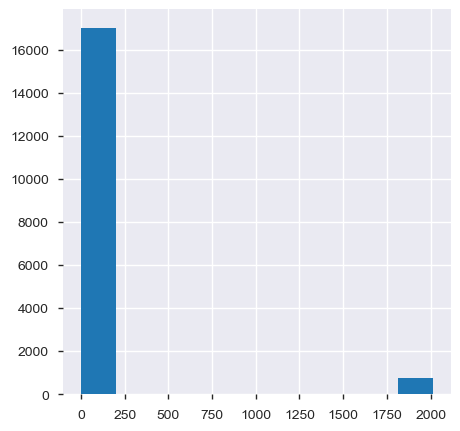

In [204]:
df['yr_renovated'].hist(figsize=(5,5),bins=10);

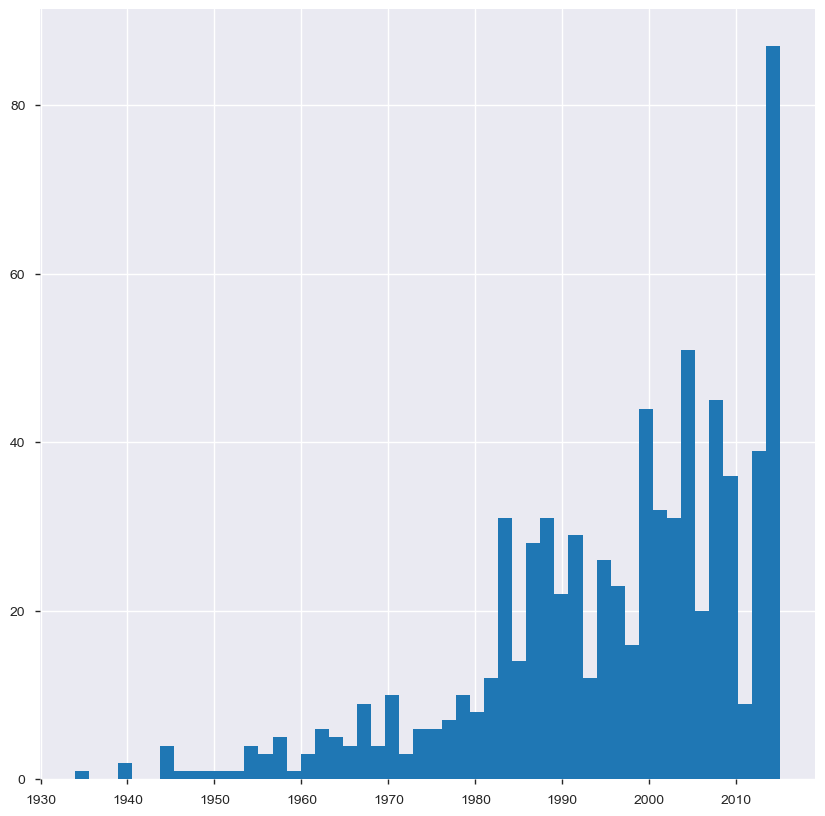

In [222]:
renovated_df = df.loc[~df['yr_renovated'].isnull()]
renovated_df = renovated_df.loc[df['yr_renovated'] > 250]
renovated_df['yr_renovated'].hist(figsize=(10,10),bins=50);

In [205]:
# looks like this if the house has been renovated, it's given a year, otherwise year is 0.
# I'm assuming during data entry for not renovated is either 0 or NaN
# This field should be changed to categories but for now the nan values will be change to 0.
# The data has renovated year as early as from 1930s, I don't think renovated in the 30s is what people have in mind when they
# ask if the home has been renovated.

In [223]:
with open('ren_df.pickle', 'wb') as f:
    pickle.dump(renovated_df, f)

In [206]:
renovated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 21 columns):
id               744 non-null int64
date             744 non-null datetime64[ns]
price            744 non-null float64
bedrooms         744 non-null int64
bathrooms        744 non-null float64
sqft_living      744 non-null int64
sqft_lot         744 non-null int64
floors           744 non-null float64
waterfront       744 non-null int64
view             744 non-null int64
condition        744 non-null int64
grade            744 non-null int64
sqft_above       744 non-null int64
has_basement     744 non-null int64
yr_built         744 non-null int64
yr_renovated     744 non-null float64
zipcode          744 non-null int64
lat              744 non-null float64
long             744 non-null float64
sqft_living15    744 non-null int64
sqft_lot15       744 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 127.9 KB


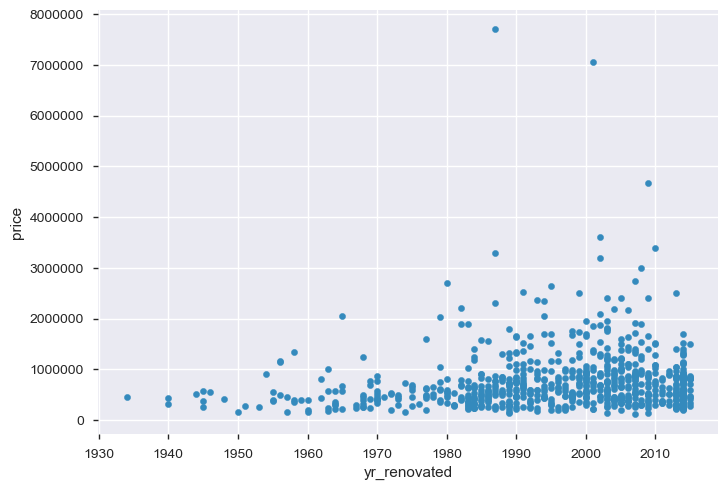

In [207]:
renovated_df.plot(kind = 'scatter', x = 'yr_renovated', y='price')

In [208]:
# much smaller data set of homes tht have been renovated.
# showing as expected price to be increasing along with year home was renovated. 
# You'll get a higher price if renovated within the last 10 years, although there are outliers,
# other factors are probably at play

In [209]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [210]:
for column in df:
    value = df[column].isna().sum()
    if value > 0:
        print(f'{column} has {value} missing values.')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
has_basement     21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 3.5 MB


In [212]:
duplicated_id = df[df.duplicated('id')]

In [213]:
duplicated_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 94 to 21565
Data columns (total 21 columns):
id               177 non-null int64
date             177 non-null datetime64[ns]
price            177 non-null float64
bedrooms         177 non-null int64
bathrooms        177 non-null float64
sqft_living      177 non-null int64
sqft_lot         177 non-null int64
floors           177 non-null float64
waterfront       177 non-null int64
view             177 non-null int64
condition        177 non-null int64
grade            177 non-null int64
sqft_above       177 non-null int64
has_basement     177 non-null int64
yr_built         177 non-null int64
yr_renovated     177 non-null float64
zipcode          177 non-null int64
lat              177 non-null float64
long             177 non-null float64
sqft_living15    177 non-null int64
sqft_lot15       177 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 30.4 KB


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
has_basement     21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 3.5 MB


In [215]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [216]:
# floors look like they are categories. I was expecting whole numbers but similar to bathrooms, the numbers have halves
# but I can't find how a halves are calcualted.

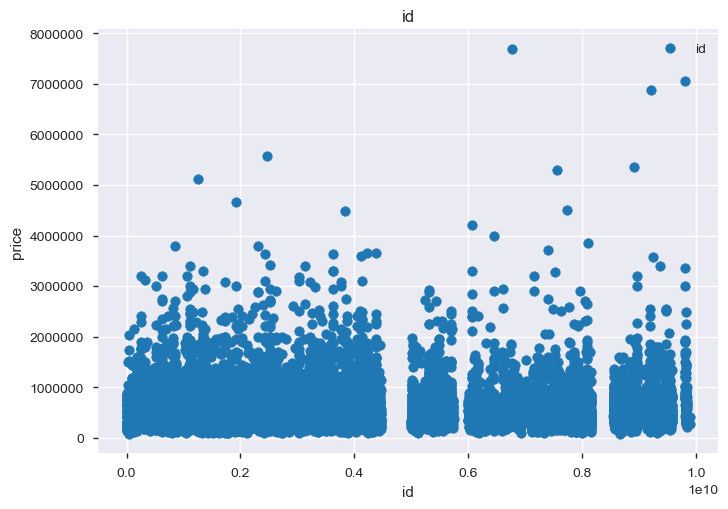

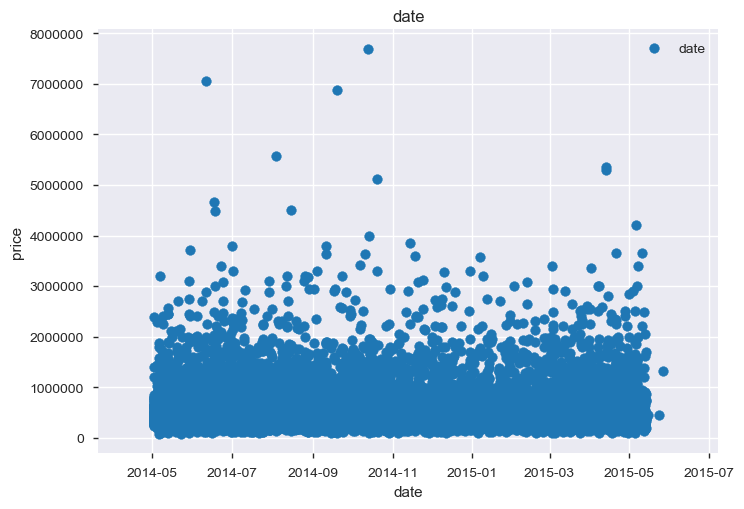

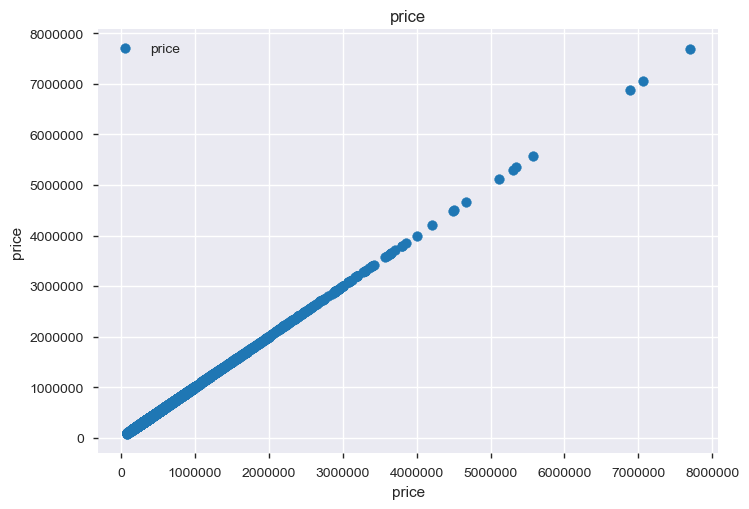

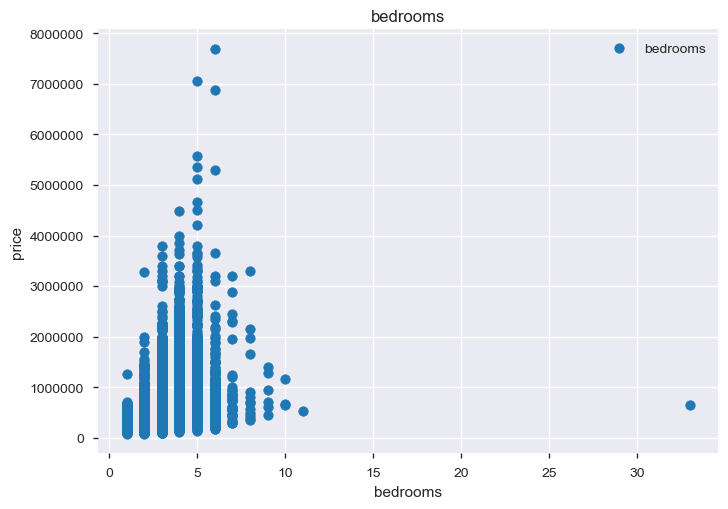

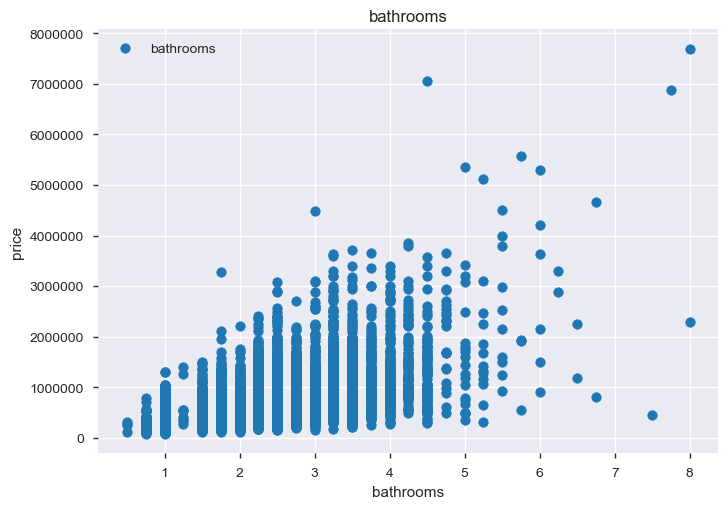

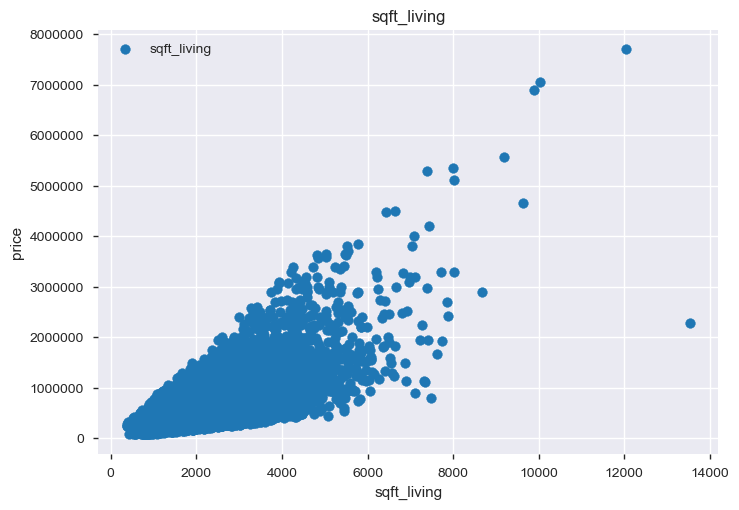

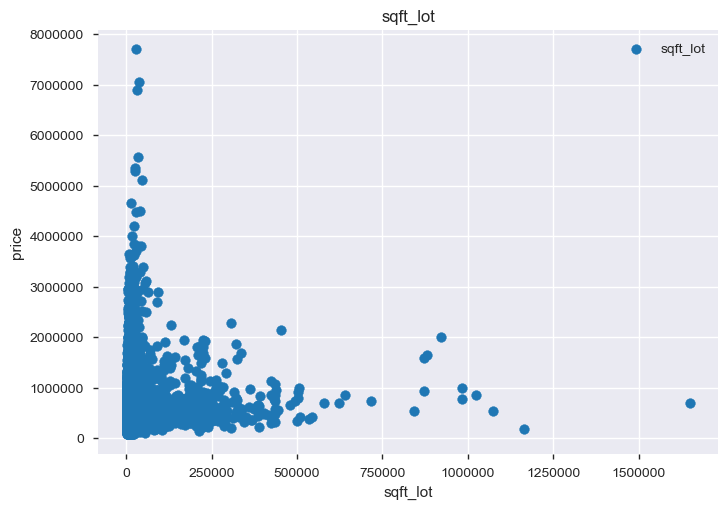

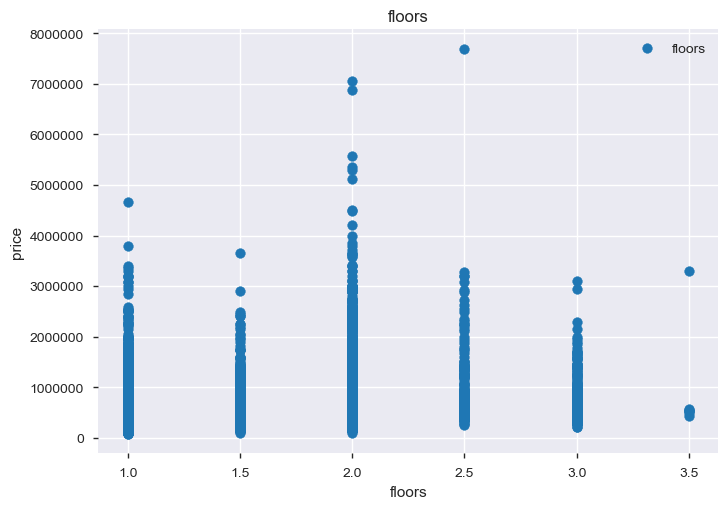

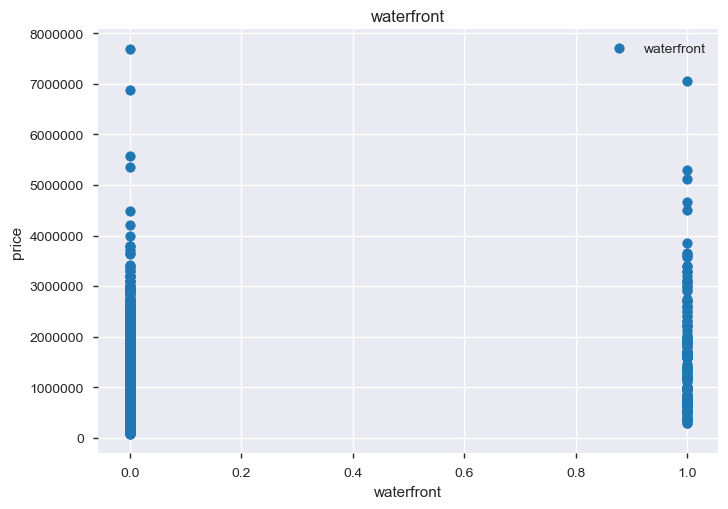

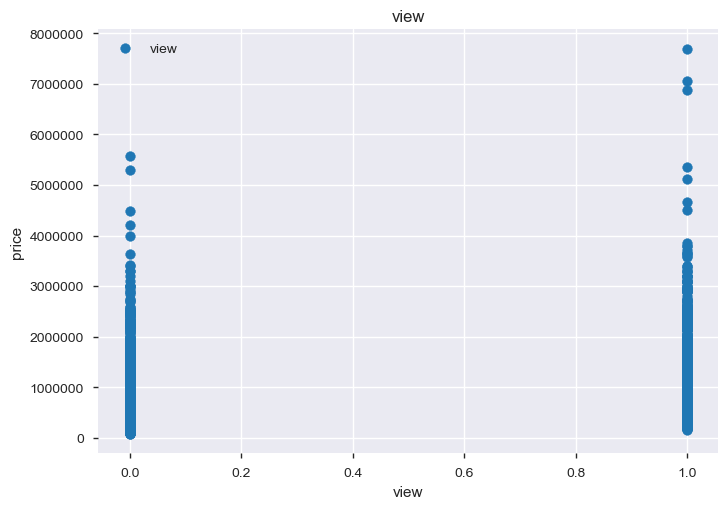

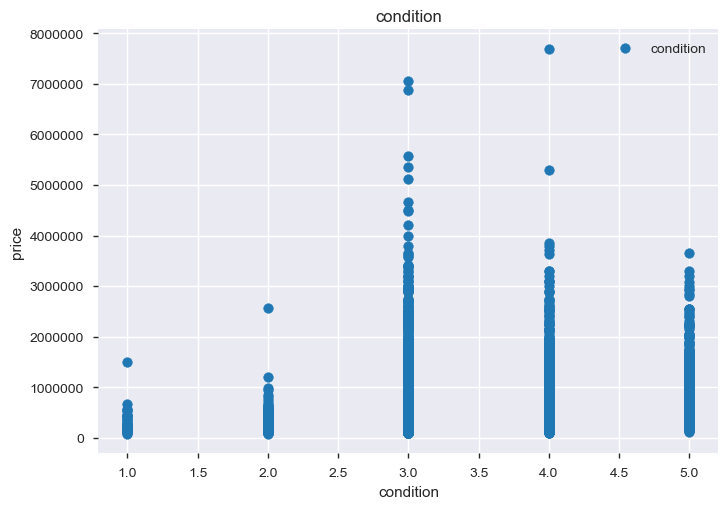

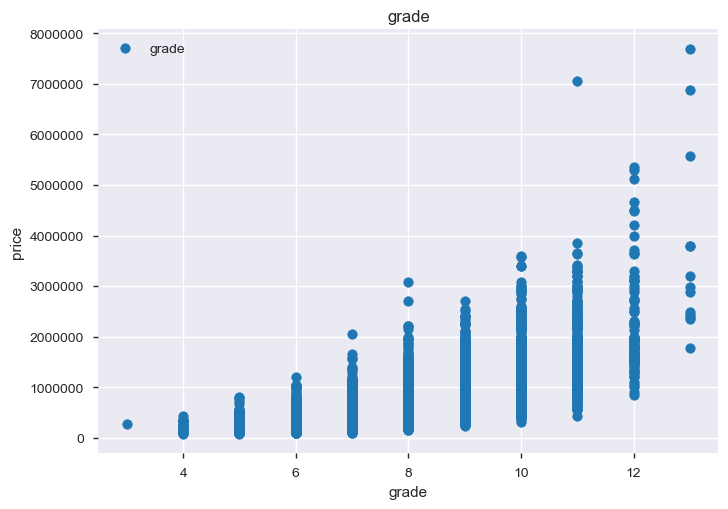

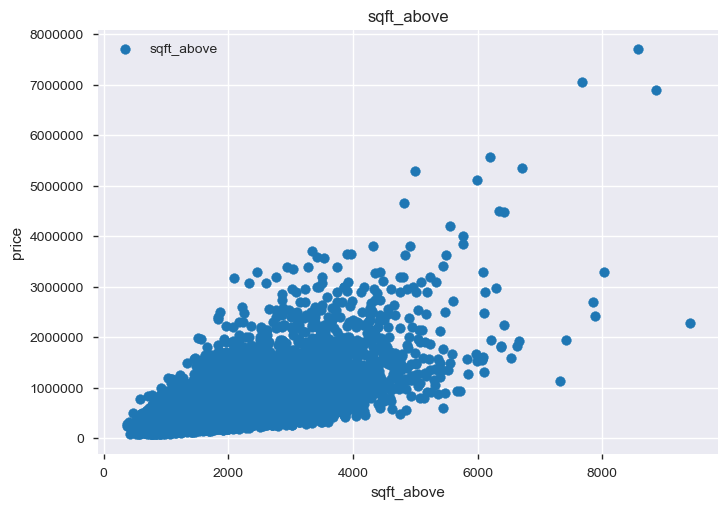

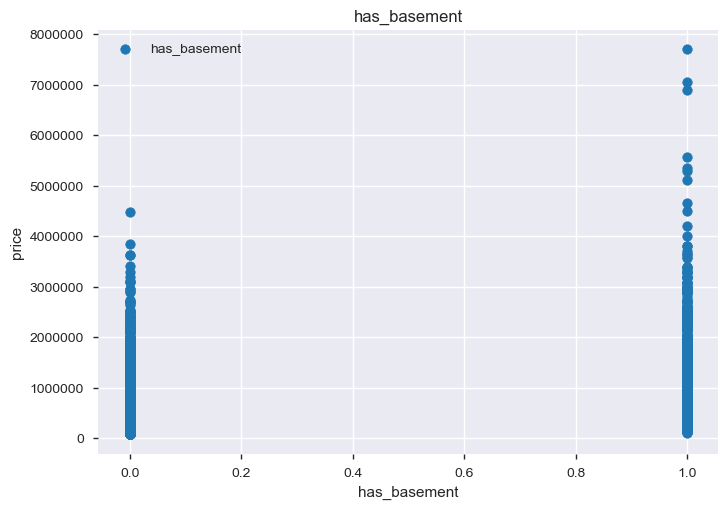

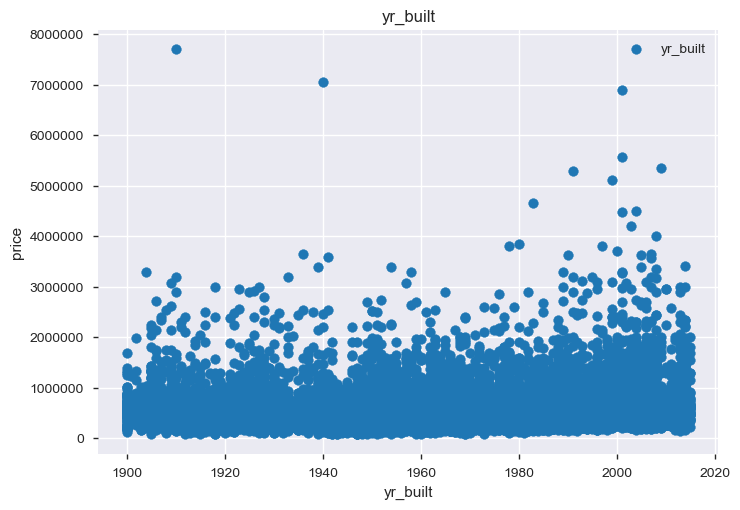

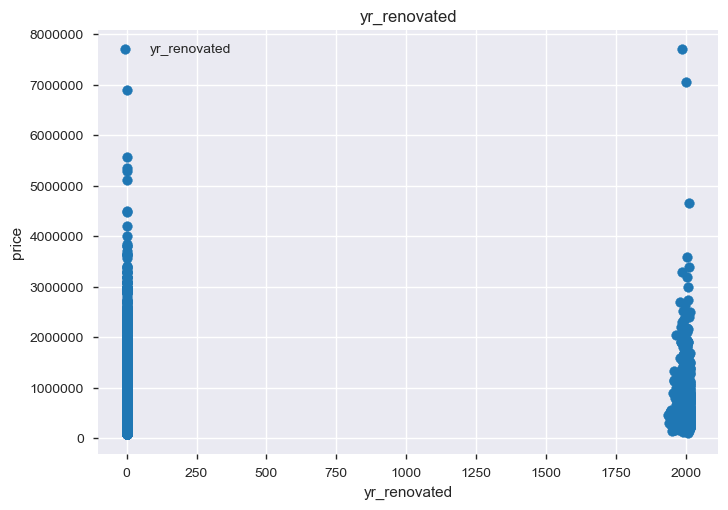

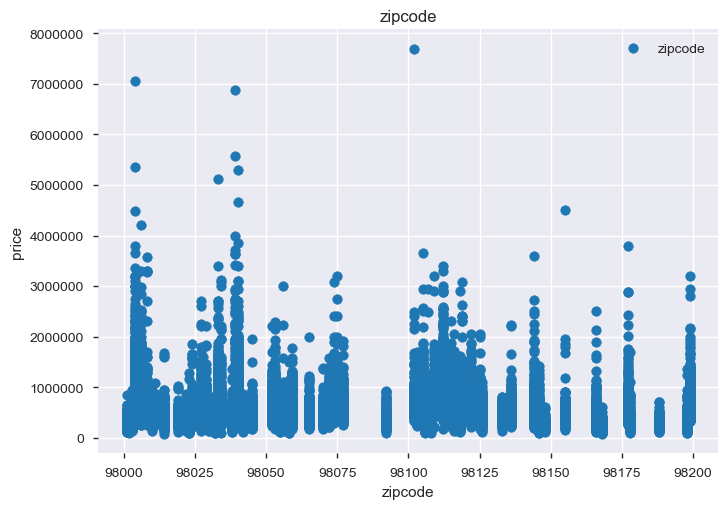

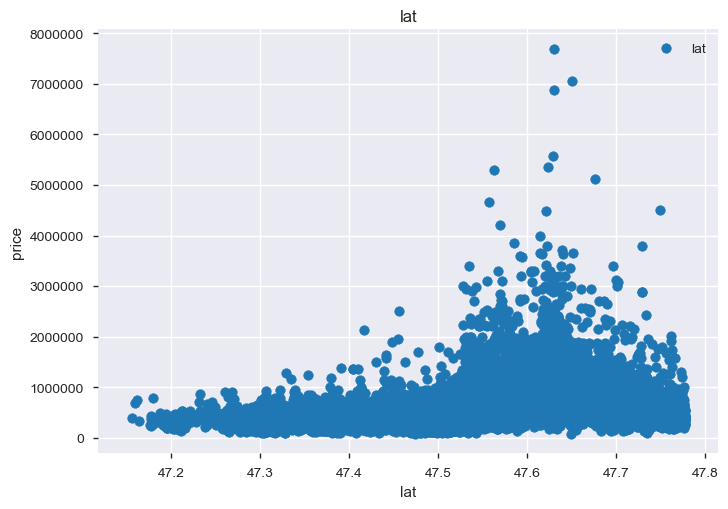

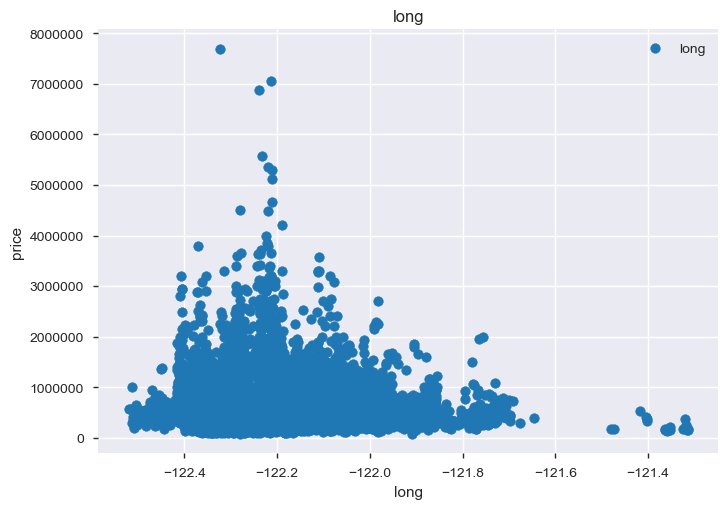

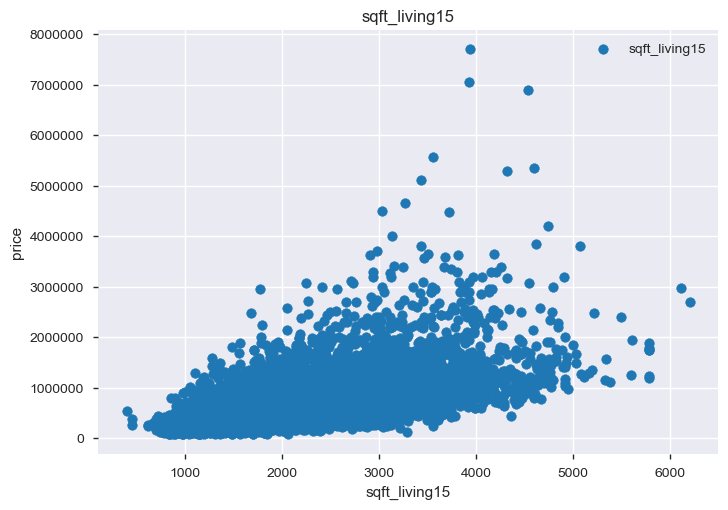

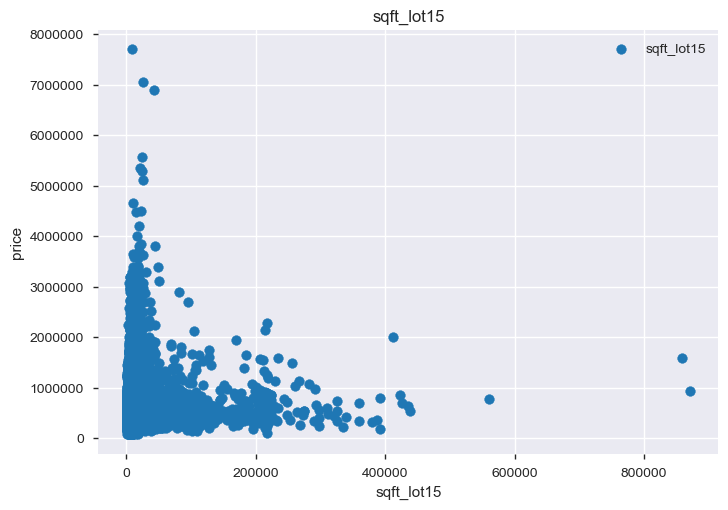

In [217]:
for col in df.columns: 
    plt.scatter(df[col], df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

In [218]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'

x_cols = df.drop(['price', 'date','has_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.698      
Dependent Variable:       price                AIC:                    588949.4420
Date:                     2020-07-28 02:20     BIC:                    589093.0876
No. Observations:         21597                Log-Likelihood:         -2.9446e+05
Df Model:                 17                   F-statistic:            2936.      
Df Residuals:             21579                Prob (F-statistic):     0.00       
R-squared:                0.698                Scale:                  4.0772e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|     [0.025        0.975]   
----------------------------------------------------------------------------------
Intercept     6045740.6153 2941268.3866   2.0555 0.0398  280637.1446 11810844.0859
bedrooms       -36431.1956    1906.4168 -19.1098 0.0000  -40167.9133   -32694.4778
bathrooms       41521.1234    3273.4808  12.6841 0.0000   35104.8592    47937.3877
sqft_living       151.8617       4.4059  34.4676 0.0000     143.2257      160.4976
sqft_lot            0.1360       0.0481   2.8297 0.0047       0.0418        0.2303
floors           7753.9902    3611.8760   2.1468 0.0318     674.4462    14833.5342
waterfront     699558.8404   17397.1211  40.2112 0.0000  665459.1970   733658.4838
view           115981.7504    5221.0856  22.2141 0.0000  105748.0367   126215.4642
condition       27014.2208    2353.7303  11.4772 0.0000   22400.7355    31627.7061
grade           97746.2757    2166.2025  45.1233 0.0000   93500.3587   101992.1927
sqft_above         28.9612       4.3703   6.6268 0.0000      20.3950       37.5274
yr_built        -2650.6197      72.1786 -36.7230 0.0000   -2792.0952    -2509.1442
yr_renovated       24.1317       3.9898   6.0484 0.0000      16.3115       31.9520
zipcode          -575.7685      33.0947 -17.3976 0.0000    -640.6367     -510.9004
lat            597751.2435   10770.9365  55.4967 0.0000  576639.4117   618863.0753
long          -216954.7822   13203.4693 -16.4316 0.0000 -242834.5580  -191075.0063
sqft_living15      22.8233       3.4641   6.5885 0.0000      16.0334       29.6132
sqft_lot15         -0.3864       0.0736  -5.2510 0.0000      -0.5306       -0.2422
----------------------------------------------------------------------------------
Omnibus:                 18372.423          Durbin-Watson:             1.987      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1837283.188
Skew:                    3.572              Prob(JB):                  0.000      
Kurtosis:                47.617             Condition No.:             215444781  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [219]:
import pickle
# Save
with open('regression_model1.pickle', 'wb') as f:
    pickle.dump(model, f)
    # Save
with open('cleaned_df.pickle', 'wb') as f:
    pickle.dump(df, f)